# WALMART CASE STUDY - By Bhagyashree Sharma

Let us import important libraries for the analysis of our data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

Downloading the dataset..

In [2]:
df = pd.read_csv(r"C:\Users\bsbha\OneDrive\Desktop\Scaler\Sacler Case Studies\Case Study 4 - Walmart\Dataset_walmart.csv")

### We need to figure out the spending habits in Walmart based on gender.
For that, let us explore our dataset and do some basic analysis!

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [5]:
df.shape

(550068, 10)

From the above line of codes, we can see that our dataset contains a total of 550068 rows and a total of 10 columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


### It can be concluded from the above line of code that our data set contains no null values.Hence, no null correction is required as such!

Let us do some basic analysis to find out some more information about our data viz. mean, standard deviation etc. of the columns!

In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [8]:
df.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [9]:
len(df.drop_duplicates())

550068

In [10]:
df['User_ID'].nunique()

5891

The above line of code shows that there are a total of 5891 users and thus implying that these 5891 made purchases giving us a total of 550068 rows of information.

### Let us now create a function to plot countplot for categorical columns for better understanding of data and distribution of the attributes across our dataset.

In [12]:
def val_count_analysis(x):
    '''
    Takes a column as input x.
    returns value counts of the column and plots a countplot for the column x
    '''

    sns.countplot(x=x,data=df)
    return x.value_counts(normalize=True)*100

Gender
M    75.310507
F    24.689493
Name: proportion, dtype: float64

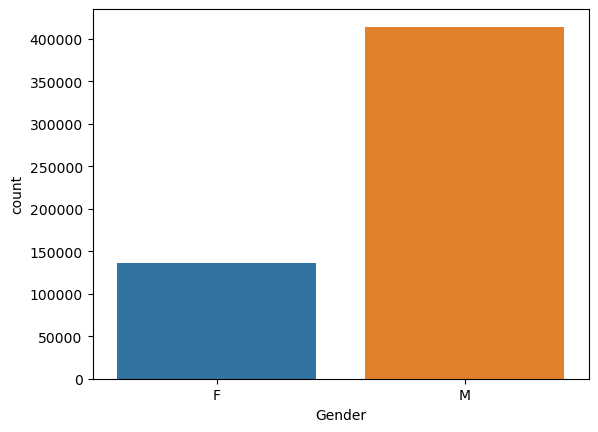

In [13]:
val_count_analysis(df['Gender'])

This shows that Walmart dataset contains a total of approximately 75% purchases made by male as opposed to approximately 25% purchases made by females.

Age
26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: proportion, dtype: float64

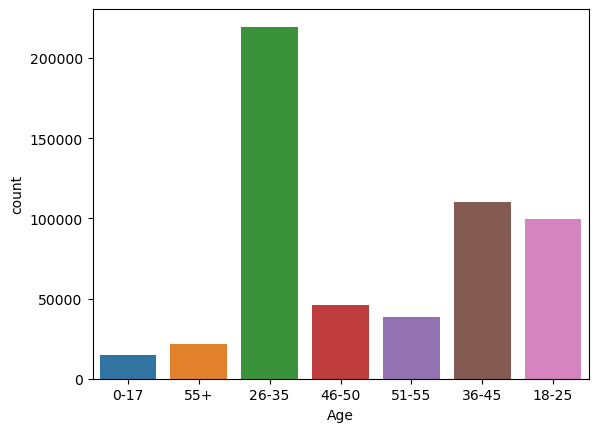

In [14]:
val_count_analysis(df['Age'])

The data is divided into 7 different bins corresponsing to different age brackets depicting most purchases made by people of age 26 to 35 followed by people of ages 36-45 then followed by the 18 to 25 age bracket. There is a significant difference in spending habit of people of age 26 - 35. This could be due to -
1. More fashion trends.
2. New family set-ups.
3. Better earnings as opposed to lower ages.
4. More inclination towards shopping.

Same points can be made for age bracket 36-45 also.

All in all we can say that people from age ranging between 18 - 45 purchase more than other age groups.

Does gender play a role in this? Let's see..!

<Axes: xlabel='Age', ylabel='count'>

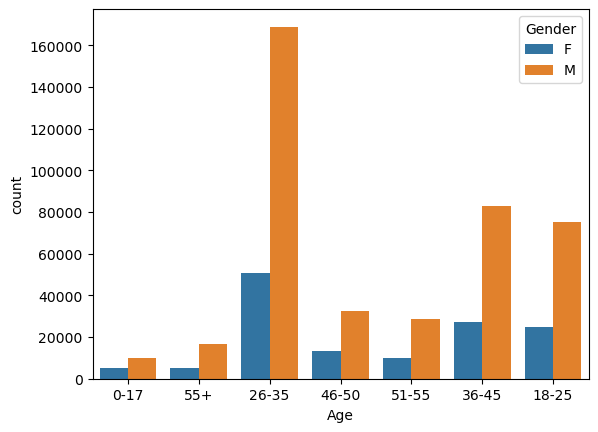

In [15]:
sns.countplot(x='Age',hue='Gender',data=df)

Very unlike to the natural thought process, we see that females are spending less than the males as per the given dataset. This can be because of :-
1. Insufficient data points.
2. Combined purchases (family)
3. Marketing / advertising not resonating with female buyers.
4. Shopping atmosphere might not be diverse to welcome different sets of customers.

City_Category
B    42.026259
C    31.118880
A    26.854862
Name: proportion, dtype: float64

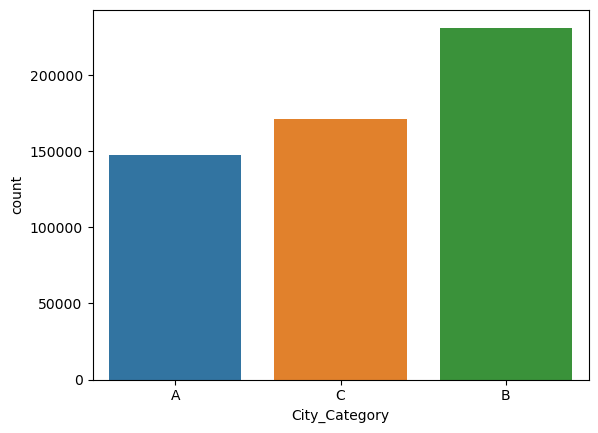

In [16]:
val_count_analysis(df['City_Category'])

We see that there are three categories of cities in the dataset - A, B, C and most of the purchases are made from the 'B' city category.

Stay_In_Current_City_Years
1     35.235825
2     18.513711
3     17.322404
4+    15.402823
0     13.525237
Name: proportion, dtype: float64

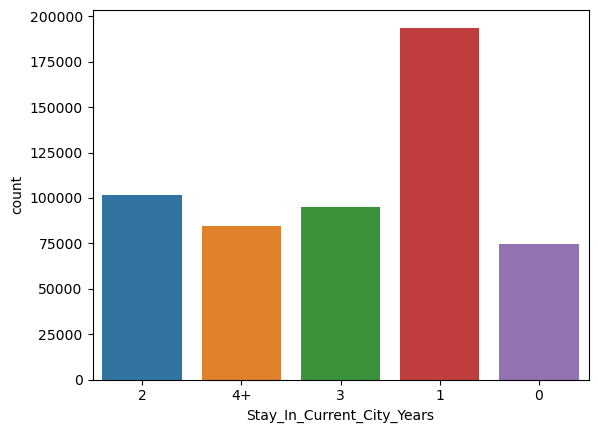

In [17]:
val_count_analysis(df['Stay_In_Current_City_Years'])

In [20]:
df_stayincity = df.groupby(['Stay_In_Current_City_Years'])['Purchase'].mean().reset_index()
df_stayincity

,Stay_In_Current_City_Years,Purchase
0,0,9180.075123
1,1,9250.145923
2,2,9320.429810
3,3,9286.904119
4,4+,9275.598872


<Axes: ylabel='Density'>

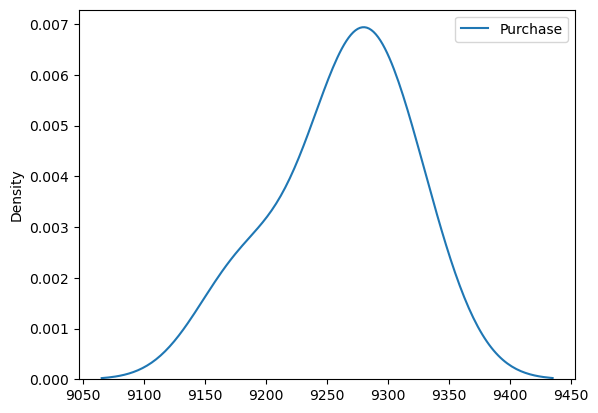

In [21]:
sns.kdeplot(df_stayincity)

We see that staying in the same city for any number of years is not showing any significant change in average spending habits of the users.

Marital_Status
0    59.034701
1    40.965299
Name: proportion, dtype: float64

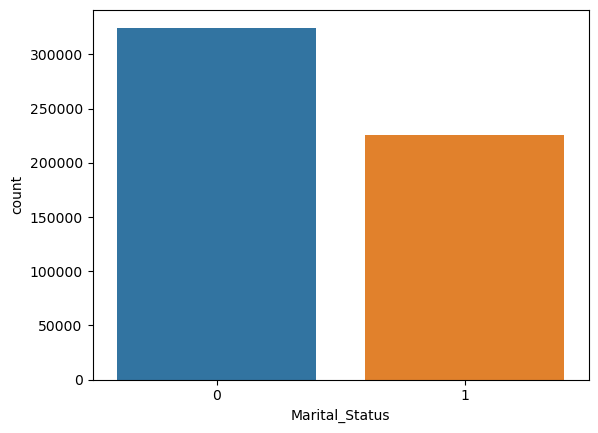

In [23]:
val_count_analysis(df['Marital_Status'])

The dataset shows out of all the purchase made, roughly 59% were made by unmarried people and 41% were made by married people  

<Axes: xlabel='Marital_Status', ylabel='count'>

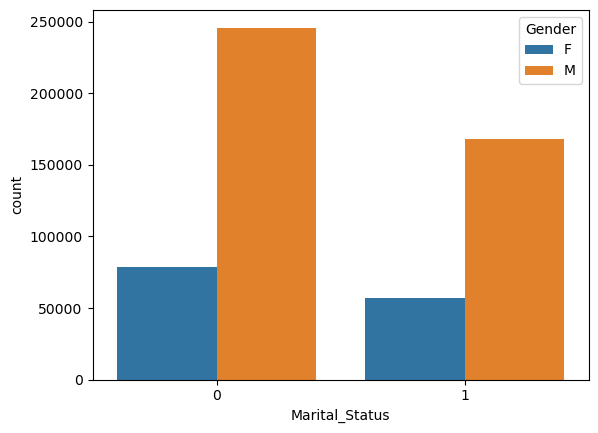

In [24]:
sns.countplot(x='Marital_Status', hue='Gender',data=df)

In [25]:
df[df['Marital_Status'] == 1]['Gender'].value_counts(normalize=True)*100

Gender
M    74.709879
F    25.290121
Name: proportion, dtype: float64

In [26]:
df[df['Marital_Status'] == 0]['Gender'].value_counts(normalize=True)*100

Gender
M    75.727294
F    24.272706
Name: proportion, dtype: float64

Again the above analysis shows that both in case of married and unmarried purchases made, roughly 75% of purchases were made by male and 25% by female.

In [27]:
df['Occupation'].nunique()

21

Occupation
4     13.145284
0     12.659889
7     10.750125
1      8.621843
17     7.279645
20     6.101427
12     5.668208
14     4.964659
2      4.833584
16     4.612339
6      3.700452
3      3.208694
10     2.350618
5      2.213726
15     2.211545
11     2.106285
19     1.538173
13     1.404917
18     1.203851
9      1.143677
8      0.281056
Name: proportion, dtype: float64

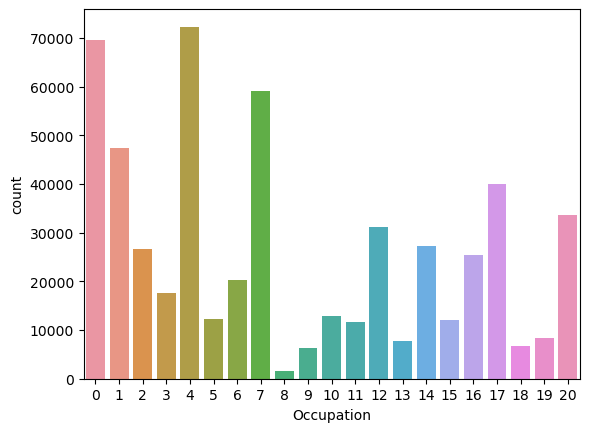

In [29]:
val_count_analysis(df['Occupation'])

Since occupation is a masked field, we can't infer much about which occupation people are exactly making the highest purchases but it seems like occupation number 4,0 and 7 stand out!! A good reflection can be made only if the proper data is available.

### Let us now see how the given data is behaving 

In [30]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [31]:
df.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


<Axes: xlabel='Purchase', ylabel='Density'>

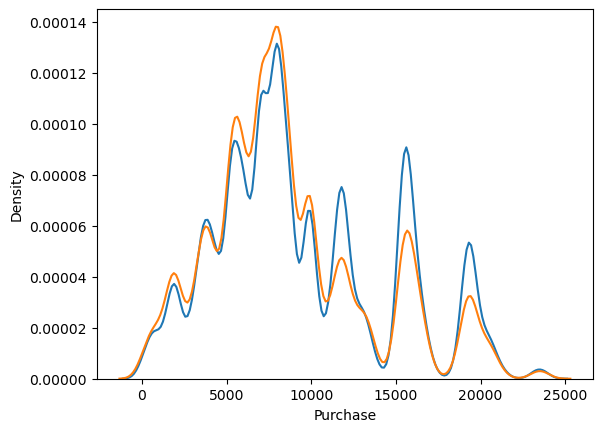

In [32]:
sns.kdeplot(df[df['Gender']=='M']['Purchase'])
sns.kdeplot(df[df['Gender']=='F']['Purchase'])

The above plot shows that the spending habit of male and females is more or less similar. But on a closer look, we can see that for purchses made upto 10000 dollors, females are spending more but above that threshold, the spending habits change, male are spending more after the threshold of 10000 dollors, which could mean - 
1. Males are spending on more expensive products.
2. Males are buying more products.
3. Females are conservative after they have spent a certain amount.

<Axes: xlabel='Age', ylabel='Count'>

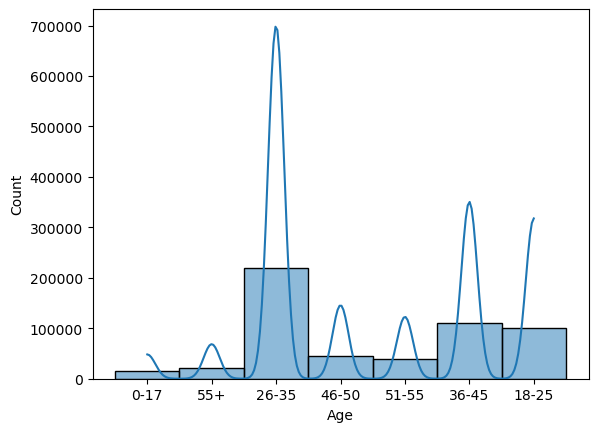

In [33]:
sns.histplot(x='Age',data=df,kde=True)

Again, we see that there are more purchases made by the buyers between the ages 18-45.

### Let us now check if there are any outliers present in our given dataset

In [37]:
df[df['Gender'] == 'M']['Purchase'].mean(),df[df['Gender'] == 'M']['Purchase'].median()

(9437.526040472265, 8098.0)

In [38]:
df[df['Gender'] == 'F']['Purchase'].mean(),df[df['Gender'] == 'F']['Purchase'].median()

(8734.565765155476, 7914.0)

<Axes: xlabel='Gender', ylabel='Purchase'>

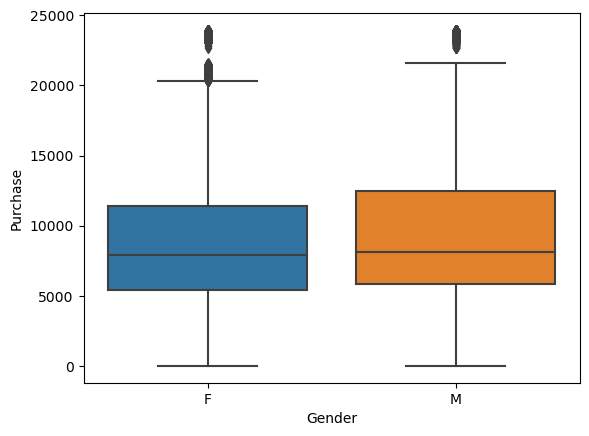

In [39]:
sns.boxplot(x='Gender',y='Purchase',data=df)

1. The difference is observed in the mean and median for both males and females, which is proved by the boxplot. The median for both males and females are almost similar. 
2. Overall expenditure of males is more and huge purchase amounts can be seen as outliers in case of females.
This again states that fact that females are conservative buyers.

In [40]:
df[(df['Gender'] == 'M') & (df['Marital_Status']==0)]['Purchase'].mean(),df[(df['Gender'] == 'M')& (df['Marital_Status']==0)]['Purchase'].median()

(9453.75674027083, 8101.0)

In [41]:
df[(df['Gender'] == 'M') & (df['Marital_Status']==1)]['Purchase'].mean(),df[(df['Gender'] == 'M')& (df['Marital_Status']==1)]['Purchase'].median()

(9413.81760509418, 8094.0)

In [42]:
df[(df['Gender'] == 'F') & (df['Marital_Status']==0)]['Purchase'].mean(),df[(df['Gender'] == 'F')& (df['Marital_Status']==0)]['Purchase'].median()

(8679.845815201532, 7895.0)

In [43]:
df[(df['Gender'] == 'F') & (df['Marital_Status']==1)]['Purchase'].mean(),df[(df['Gender'] == 'F')& (df['Marital_Status']==1)]['Purchase'].median()

(8810.249789429354, 7939.0)

<Axes: xlabel='Gender', ylabel='Purchase'>

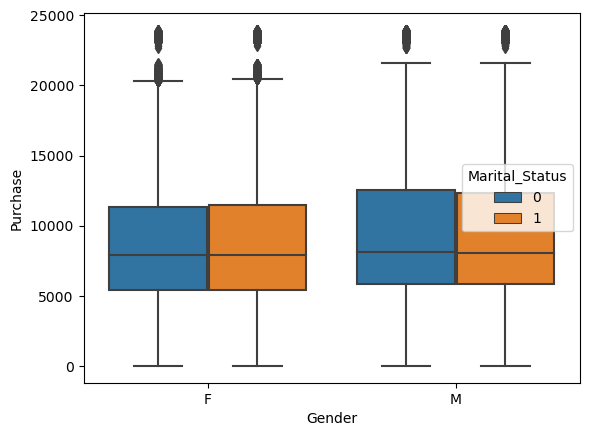

In [44]:
sns.boxplot(x='Gender',y='Purchase',hue='Marital_Status',data=df)

Same observation can be made for married and unmarried buyers. Median is same across every category and more outliers are present in case of female buyers whether married or unmarried.

<Axes: xlabel='Age', ylabel='Purchase'>

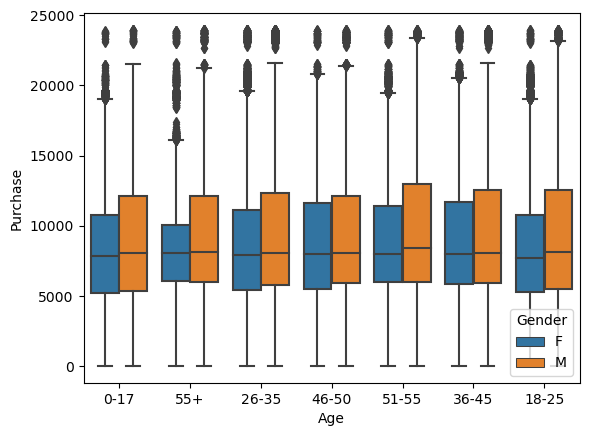

In [45]:
sns.boxplot(x='Age',y='Purchase',hue='Gender',data=df)

A lot of outlers are observed for every age group. Thus a very conclusive statement can not be made out of this.

### Let us try to see if there is a dependency between various fields of the dataset.

C:\Users\bsbha\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


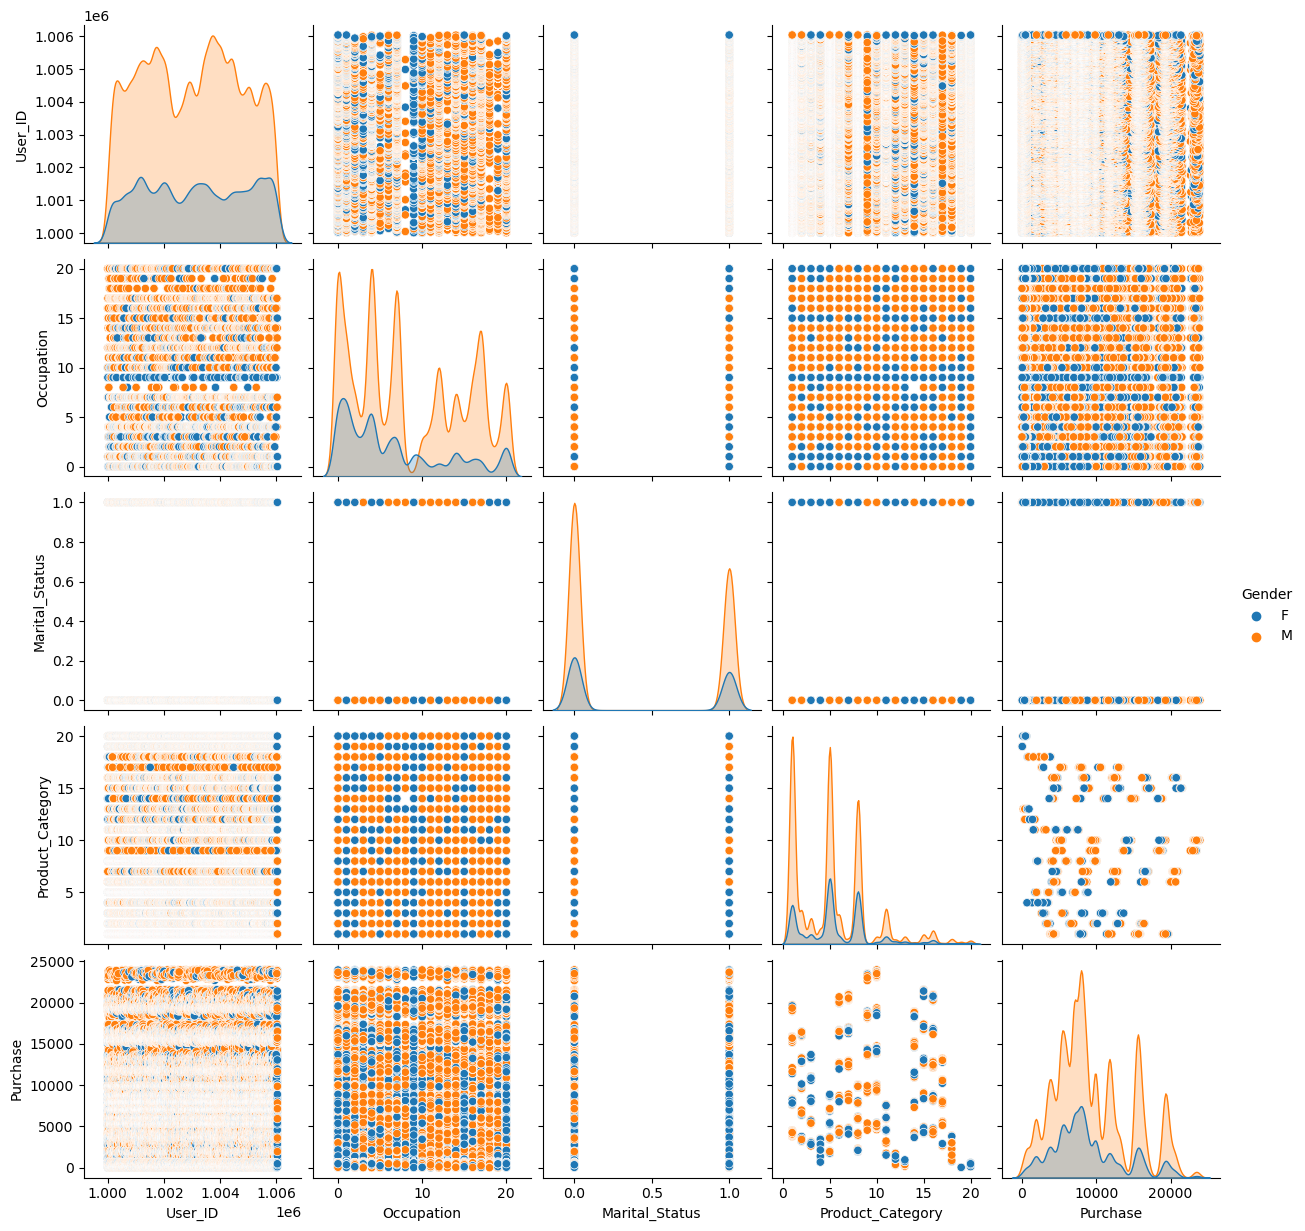

In [46]:
sns.pairplot(df,hue='Gender')
plt.show()

No dpendency is observed as such in any of the fields as such.

## Let us now do some statistical analysis to figure out spending habits of various groups.
For this purpose we are :-
1. Creating a function for generating n samples for the two genders Male and Female
2. Creating a function for generating n samples for the two genders Male and Female and marital status.
3. Creating a function for generating n samples for the two genders Male and Female in different age brackets.
4. Creating a function for finding confidence intervals - 90%, 95% and 99%.
5. Creating a function for plotting the distribution.

In [48]:
def sampling_data(n_samples,n_simulations):
    sample_1 = [df[df['Gender'] == 'M']['Purchase'].sample(n_samples).mean() for _ in range(n_simulations)]
    sample_2 = [df[df['Gender'] == 'F']['Purchase'].sample(n_samples).mean() for _ in range(n_simulations)]
    return sample_1,sample_2

In [49]:
def sampling_data_marriage(n_samples,n_simulations):
    sample_1 = [df[(df['Gender'] == 'M') & (df['Marital_Status']==0)]['Purchase'].sample(n_samples).mean() for _ in range(n_simulations)]
    sample_2 = [df[(df['Gender'] == 'M') & (df['Marital_Status']==1)]['Purchase'].sample(n_samples).mean() for _ in range(n_simulations)]
    sample_3 = [df[(df['Gender'] == 'F') & (df['Marital_Status']==0)]['Purchase'].sample(n_samples).mean() for _ in range(n_simulations)]
    sample_4 = [df[(df['Gender'] == 'F') & (df['Marital_Status']==1)]['Purchase'].sample(n_samples).mean() for _ in range(n_simulations)]
    return sample_1,sample_2, sample_3, sample_4

In [50]:
def sampling_data_age(n_samples,n_simulations):
    sample_1 = [df[(df['Gender'] == 'M') & (df['Age']=='0-17')]['Purchase'].sample(n_samples).mean() for _ in range(n_simulations)]
    sample_2 = [df[(df['Gender'] == 'M') & (df['Age']=='18-25')]['Purchase'].sample(n_samples).mean() for _ in range(n_simulations)]
    sample_3 = [df[(df['Gender'] == 'M') & (df['Age']=='26-35')]['Purchase'].sample(n_samples).mean() for _ in range(n_simulations)]
    sample_4 = [df[(df['Gender'] == 'M') & (df['Age']=='36-45')]['Purchase'].sample(n_samples).mean() for _ in range(n_simulations)]
    sample_5 = [df[(df['Gender'] == 'M') & (df['Age']=='46-50')]['Purchase'].sample(n_samples).mean() for _ in range(n_simulations)]
    sample_6 = [df[(df['Gender'] == 'M') & (df['Age']=='51-55')]['Purchase'].sample(n_samples).mean() for _ in range(n_simulations)]
    sample_7 = [df[(df['Gender'] == 'M') & (df['Age']=='55+')]['Purchase'].sample(n_samples).mean() for _ in range(n_simulations)]
    sample_8 = [df[(df['Gender'] == 'F') & (df['Age']=='0-17')]['Purchase'].sample(n_samples).mean() for _ in range(n_simulations)]
    sample_9 = [df[(df['Gender'] == 'F') & (df['Age']=='18-25')]['Purchase'].sample(n_samples).mean() for _ in range(n_simulations)]
    sample_10 = [df[(df['Gender'] == 'F') & (df['Age']=='26-35')]['Purchase'].sample(n_samples).mean() for _ in range(n_simulations)]
    sample_11 = [df[(df['Gender'] == 'F') & (df['Age']=='36-45')]['Purchase'].sample(n_samples).mean() for _ in range(n_simulations)]
    sample_12 = [df[(df['Gender'] == 'F') & (df['Age']=='46-50')]['Purchase'].sample(n_samples).mean() for _ in range(n_simulations)]
    sample_13 = [df[(df['Gender'] == 'F') & (df['Age']=='51-55')]['Purchase'].sample(n_samples).mean() for _ in range(n_simulations)]
    sample_14 = [df[(df['Gender'] == 'F') & (df['Age']=='55+')]['Purchase'].sample(n_samples).mean() for _ in range(n_simulations)]
    
    return sample_1,sample_2, sample_3, sample_4, sample_5,sample_6,sample_7,sample_8,sample_9,sample_10,sample_11,sample_12,sample_13,sample_14

In [51]:
def CI_cal(CI,type_data,data,lower_interval,upper_interval):
    interval = norm(np.mean(data), np.std(data)).ppf(lower_interval), norm(np.mean(data), np.std(data)).ppf(upper_interval)
    print('Range with '+ CI + ' confidence interval for '+type_data+':',interval)

In [52]:
def plot_data(gender,sample_data):
    fig = plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.kdeplot(df[df['Gender'] == gender]['Purchase'])
    plt.title(gender + ' Original Data')
    plt.subplot(1,2,2)
    sns.kdeplot(sample_data)
    plt.title(gender +' Sampled Data')

## Analysis for Male and Female purchasing habit - 
'Number of Samples = 500'

In [53]:
male_sampling_data,female_sampling_data = sampling_data(500,500)

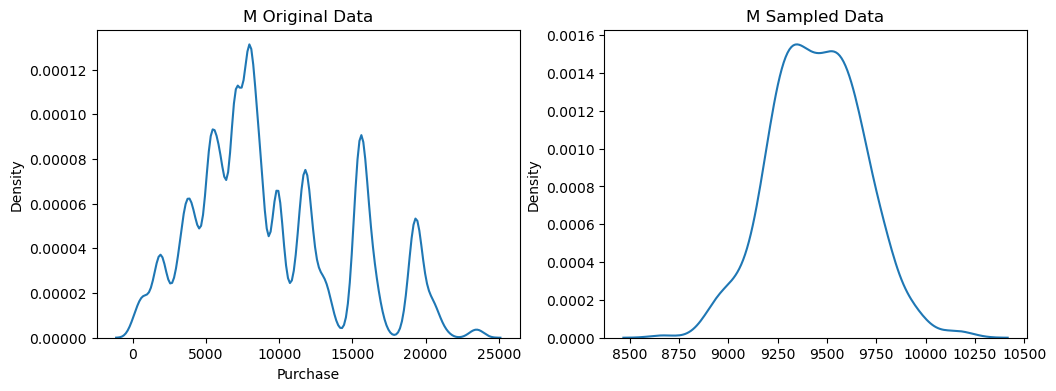

In [54]:
plot_data('M',male_sampling_data)

In [55]:
print(np.mean(male_sampling_data))
print(np.std(male_sampling_data))

9449.34586
231.50828367414502


In [56]:
print(df[df['Gender'] == 'M']['Purchase'].mean())
print(df[df['Gender'] == 'M']['Purchase'].std())

9437.526040472265
5092.186209777949


In [57]:
np.std(male_sampling_data)*np.sqrt(500)

5176.68259649693

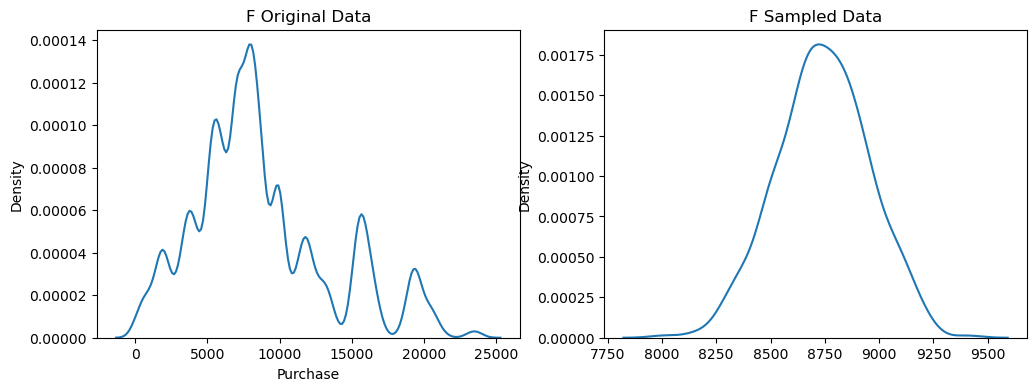

In [58]:
plot_data('F',female_sampling_data)

In [59]:
print(np.mean(female_sampling_data))
print(np.std(female_sampling_data))

8741.782427999999
211.83265385695566


In [60]:
print(df[df['Gender'] == 'F']['Purchase'].mean())
print(df[df['Gender'] == 'F']['Purchase'].std())

8734.565765155476
4767.233289291444


In [61]:
np.std(female_sampling_data)*np.sqrt(500)

4736.722138783359

### 90% confidence interval for a 500 samples taken

In [62]:
CI_cal('90%','Male_Buying',male_sampling_data,0.05,0.95)
CI_cal('90%','Female_Buying',female_sampling_data,0.05,0.95)

Range with 90% confidence interval for Male_Buying: (9068.548619929272, 9830.143100070727)
Range with 90% confidence interval for Female_Buying: (8393.348718996629, 9090.216137003368)


With 90% confidence interval we can see that the two intervals are overlapping - thus no conclusive evidence can be given on buying habits of a specific gender. Let us find out for other confidence intervals, although the reults might still be inconclusive

### 95% confidence interval for a 500 samples taken

In [63]:
CI_cal('95%','Male_Buying',male_sampling_data,0.025,0.975)
CI_cal('95%','Female_Buying',female_sampling_data,0.025,0.975)

Range with 95% confidence interval for Male_Buying: (8995.597961875992, 9903.093758124005)
Range with 95% confidence interval for Female_Buying: (8326.598055690825, 9156.966800309172)


The results are getting further inconclusive. Let us try with 99%.

### 99% confidence interval for a 500 samples taken

In [64]:
CI_cal('99%','Male_Buying',male_sampling_data,0.005,0.995)
CI_cal('99%','Female_Buying',female_sampling_data,0.005,0.995)

Range with 99% confidence interval for Male_Buying: (8853.020038897825, 10045.671681102174)
Range with 99% confidence interval for Female_Buying: (8196.13767074672, 9287.427185253277)


Again.. No conclusive results! Let us increase the sample size and see if some evidentry proof is found!

## Analysis for Male and Female purchasing habit - 
'Number of Samples = 1000'

In [65]:
male_sampling_data,female_sampling_data = sampling_data(1000,1000)

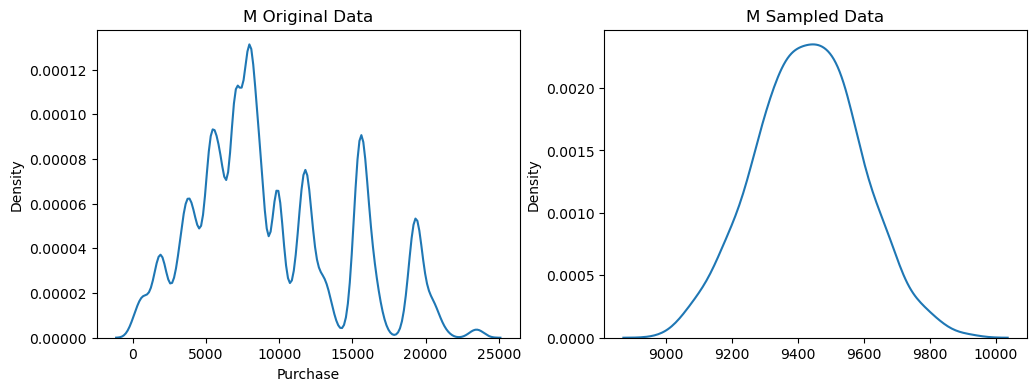

In [66]:
plot_data('M',male_sampling_data)

In [67]:
print(np.mean(male_sampling_data))
print(np.std(male_sampling_data))

9431.175686999999
158.62125077315156


In [68]:
print(df[df['Gender'] == 'M']['Purchase'].mean())
print(df[df['Gender'] == 'M']['Purchase'].std())

9437.526040472265
5092.186209777949


In [69]:
np.std(male_sampling_data)*np.sqrt(1000)

5016.044377479035

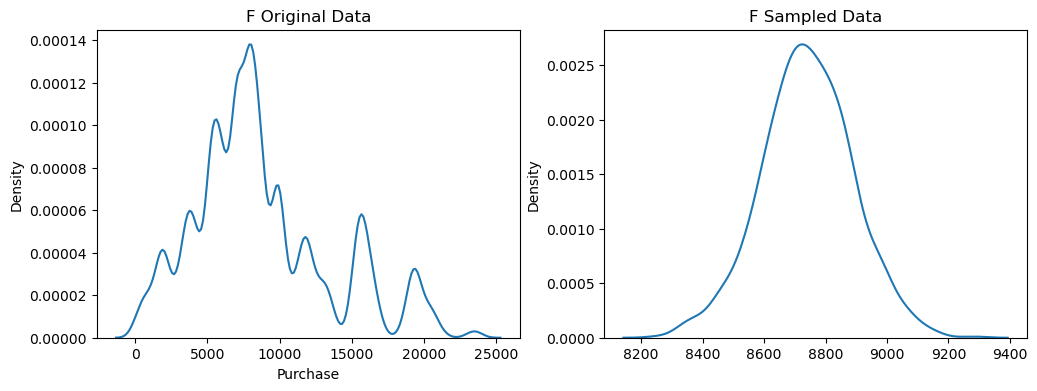

In [70]:
plot_data('F',female_sampling_data)

In [71]:
print(np.mean(female_sampling_data))
print(np.std(female_sampling_data))

8740.07834
148.65035095812053


In [72]:
print(df[df['Gender'] == 'F']['Purchase'].mean())
print(df[df['Gender'] == 'F']['Purchase'].std())

8734.565765155476
4767.233289291444


In [73]:
np.std(female_sampling_data)*np.sqrt(1000)

4700.736840110538

### 90% confidence interval for a 1000 samples taken

In [74]:
CI_cal('90%','Male_Buying',male_sampling_data,0.05,0.95)
CI_cal('90%','Female_Buying',female_sampling_data,0.05,0.95)

Range with 90% confidence interval for Male_Buying: (9170.266947354201, 9692.084426645797)
Range with 90% confidence interval for Female_Buying: (8495.570271078926, 8984.586408921074)


As we can see that after increasing the sample size to 1000, evidentry proofs started flowing in. With the above analysis we can say that overall with a 90% confidence interval -
1. Males are likely to spend somewhere between 9170 dollors to 9700 dollors.
2. Females are likely to spend somewher between 8500 dollors to 9000 dollors.

Not a big difference, still, we can say that men spend slighlty more than women!

Let us try to find out if we can say the same with a confidence interval of 95%!

### 95% confidence interval for a 1000 samples taken

In [75]:
CI_cal('95%','Male_Buying',male_sampling_data,0.025,0.975)
CI_cal('95%','Female_Buying',female_sampling_data,0.025,0.975)

Range with 95% confidence interval for Male_Buying: (9120.283748301925, 9742.067625698071)
Range with 95% confidence interval for Female_Buying: (8448.729005832845, 9031.427674167155)


Yes, the two confidence intervals are not overlapping thus with a 95% confidence we can say that men are likely to spend slightly more than women!!
    
    
Let us see what happens when we increase the CI to 99%!!

### 99% confidence interval for a 1000 samples taken

In [76]:
CI_cal('99%','Male_Buying',male_sampling_data,0.005,0.995)
CI_cal('99%','Female_Buying',female_sampling_data,0.005,0.995)

Range with 99% confidence interval for Male_Buying: (9022.594421092937, 9839.75695290706)
Range with 99% confidence interval for Female_Buying: (8357.180410019244, 9122.976269980756)


The confidence intervals have started to overlap.
Thus we can say with a 95% confidence that overall men are likely to spend slightly more than women

## Let us find if marriage is a factor in buying habits!!

Let us create a sample of 1000 men and women!

In [77]:
male_sam_unmarried, male_sam_married,female_sam_unmarried,female_sam_married = sampling_data_marriage(1000,1000)

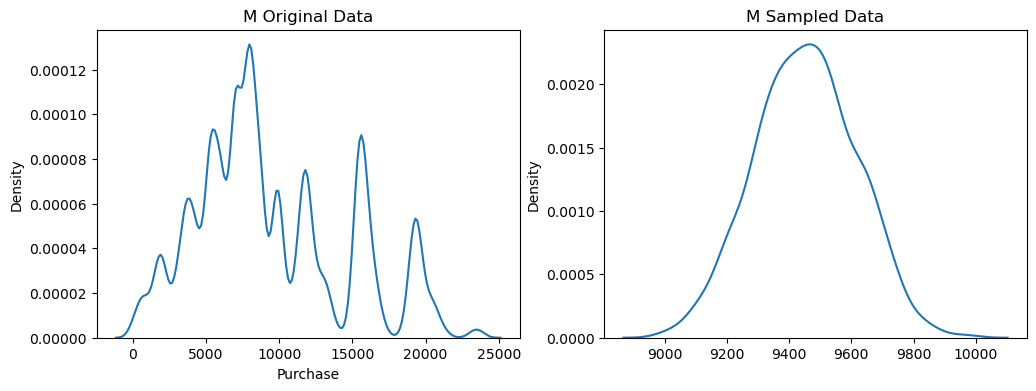

In [78]:
plot_data('M',male_sam_unmarried)

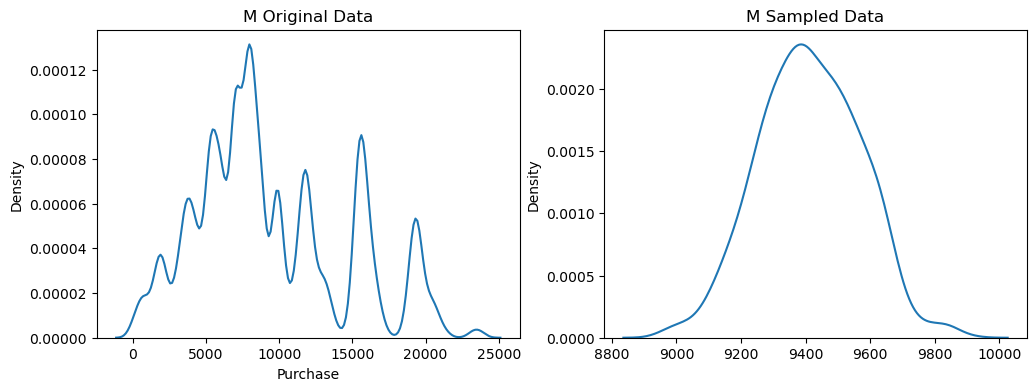

In [79]:
plot_data('M',male_sam_married)

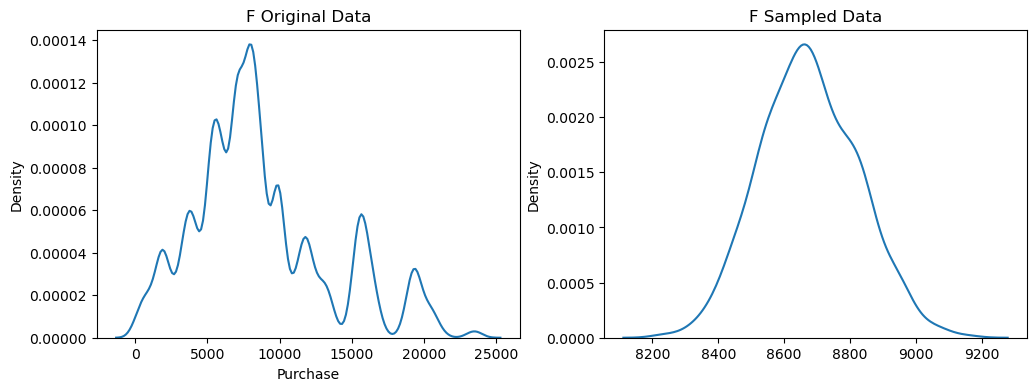

In [80]:
plot_data('F',female_sam_unmarried)

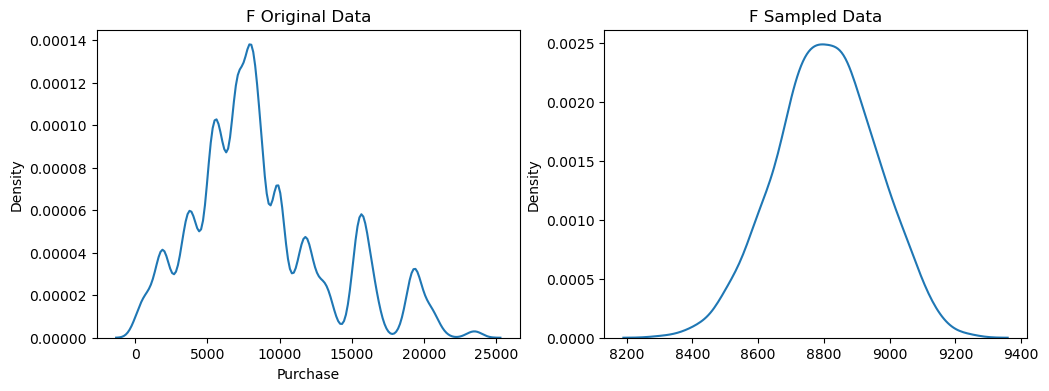

In [81]:
plot_data('F',female_sam_married)

### 90% confidence interval

In [82]:
CI_cal('90%','Male_Unmarried',male_sam_unmarried,0.05,0.95)
CI_cal('90%','Female_Unmarried',female_sam_unmarried,0.05,0.95)

Range with 90% confidence interval for Male_Unmarried: (9185.849098061655, 9719.932225938344)
Range with 90% confidence interval for Female_Unmarried: (8430.354130821368, 8921.227935178635)


In [83]:
CI_cal('90%','Male_Married',male_sam_married,0.05,0.95)
CI_cal('90%','Female_Married',female_sam_married,0.05,0.95)

Range with 90% confidence interval for Male_Married: (9153.3764978025, 9671.9780041975)
Range with 90% confidence interval for Female_Married: (8557.415093179949, 9056.14354682005)


### 95% Confidence interval

In [84]:
CI_cal('95%','Male_Unmarried',male_sam_unmarried,0.025,0.975)
CI_cal('95%','Female_Unmarried',female_sam_unmarried,0.025,0.975)

Range with 95% confidence interval for Male_Unmarried: (9134.691012427262, 9771.090311572738)
Range with 95% confidence interval for Female_Unmarried: (8383.334925742141, 8968.247140257861)


In [85]:
CI_cal('95%','Male_Married',male_sam_married,0.025,0.975)
CI_cal('95%','Female_Married',female_sam_married,0.025,0.975)

Range with 95% confidence interval for Male_Married: (9103.701346333557, 9721.653155666441)
Range with 95% confidence interval for Female_Married: (8509.643516794335, 9103.915123205665)


### 99% Confidence interval

In [86]:
CI_cal('99%','Male_Unmarried',male_sam_unmarried,0.005,0.995)
CI_cal('99%','Female_Unmarried',female_sam_unmarried,0.005,0.995)

Range with 99% confidence interval for Male_Unmarried: (9034.705436039945, 9871.075887960054)
Range with 99% confidence interval for Female_Unmarried: (8291.438556618443, 9060.14350938156)


In [87]:
CI_cal('99%','Male_Married',male_sam_married,0.005,0.995)
CI_cal('99%','Female_Married',female_sam_married,0.005,0.995)

Range with 99% confidence interval for Male_Married: (9006.614080651938, 9818.74042134806)
Range with 99% confidence interval for Female_Married: (8416.276680631196, 9197.281959368804)


1. From the above analysis for both married and unmarried men and women, it can be said with 95% confidence that overall men whether married or unmarried tend to spend more than the women.
2. With 95% confidence it can be said that married men spend same as unmarried men while married women spend slightly more than unmarried women!!

### Let us analyse if age groups play a role in purchasing habits of men and women!

In [88]:
df['Age'].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [89]:
df.groupby(['Age','Gender'])['Purchase'].mean()

Age    Gender
0-17   F         8338.771985
       M         9235.173670
18-25  F         8343.180201
       M         9440.942971
26-35  F         8728.251754
       M         9410.337578
36-45  F         8959.844056
       M         9453.193643
46-50  F         8842.098947
       M         9357.471509
51-55  F         9042.449666
       M         9705.094802
55+    F         9007.036199
       M         9438.195603
Name: Purchase, dtype: float64

According to dataset ages 18-45 

In [91]:
m17,m25,m35,m45,m50,m55,mabove,f17,f25,f35,f45,f50,f55,fabove = sampling_data_age(500,500)

### 90% Confidence Interval

In [92]:
CI_cal('90%','Male upto 17',m17,0.05,0.95)
CI_cal('90%','Female upto 17',f17,0.05,0.95)

Range with 90% confidence interval for Male upto 17: (8845.959077762514, 9600.116098237484)
Range with 90% confidence interval for Female upto 17: (7981.838853929761, 8705.036874070238)


In [93]:
CI_cal('90%','Male 18-25',m25,0.05,0.95)
CI_cal('90%','Female 18-25',f25,0.05,0.95)

Range with 90% confidence interval for Male 18-25: (9082.255439896142, 9801.038328103861)
Range with 90% confidence interval for Female 18-25: (7995.056749697286, 8699.243154302714)


In [94]:
CI_cal('90%','Male 26-35',m35,0.05,0.95)
CI_cal('90%','Female 26-35',f35,0.05,0.95)

Range with 90% confidence interval for Male 26-35: (9031.767870980084, 9801.482041019915)
Range with 90% confidence interval for Female 26-35: (8406.547882898432, 9077.57243710157)


In [95]:
CI_cal('90%','Male 36-45',m45,0.05,0.95)
CI_cal('90%','Female 36-45',f45,0.05,0.95)

Range with 90% confidence interval for Male 36-45: (9109.254851116322, 9809.74854088368)
Range with 90% confidence interval for Female 36-45: (8578.241387931224, 9323.27967606878)


In [96]:
CI_cal('90%','Male 46-50',m50,0.05,0.95)
CI_cal('90%','Female 46-50',f50,0.05,0.95)

Range with 90% confidence interval for Male 46-50: (8973.470924555355, 9728.511075444645)
Range with 90% confidence interval for Female 46-50: (8491.041629025565, 9170.793546974435)


In [97]:
CI_cal('90%','Male 50-55',m55,0.05,0.95)
CI_cal('90%','Female 50-55',f55,0.05,0.95)

Range with 90% confidence interval for Male 50-55: (9310.687414547981, 10096.015801452015)
Range with 90% confidence interval for Female 50-55: (8714.787606010635, 9371.969225989367)


In [98]:
CI_cal('90%','Male 55+',mabove,0.05,0.95)
CI_cal('90%','Female 55+',fabove,0.05,0.95)

Range with 90% confidence interval for Male 55+: (9080.037402965252, 9817.66257303475)
Range with 90% confidence interval for Female 55+: (8663.579943867719, 9349.637056132282)


### 95% Confidence Interval

In [113]:
CI_cal('95%','Male upto 17',m17,0.025,0.975)
CI_cal('95%','Female upto 17',f17,0.025,0.975)

Range with 95% confidence interval for Male upto 17: (8773.720829779244, 9672.354346220754)
Range with 95% confidence interval for Female upto 17: (7912.566067889772, 8774.309660110226)


In [114]:
CI_cal('95%','Male 18-25',m25,0.025,0.975)
CI_cal('95%','Female 18-25',f25,0.025,0.975)

Range with 95% confidence interval for Male 18-25: (9013.405564983117, 9869.888203016886)
Range with 95% confidence interval for Female 18-25: (7927.605024471288, 8766.694879528712)


In [115]:
CI_cal('95%','Male 26-35',m35,0.025,0.975)
CI_cal('95%','Female 26-35',f35,0.025,0.975)

Range with 95% confidence interval for Male 26-35: (8958.03945424194, 9875.21045775806)
Range with 95% confidence interval for Female 26-35: (8342.272623458613, 9141.847696541388)


In [116]:
CI_cal('95%','Male 36-45',m45,0.025,0.975)
CI_cal('95%','Female 36-45',f45,0.025,0.975)

Range with 95% confidence interval for Male 36-45: (9042.156839033558, 9876.846552966445)
Range with 95% confidence interval for Female 36-45: (8506.876593658519, 9394.644470341485)


In [117]:
CI_cal('95%','Male 46-50',m50,0.025,0.975)
CI_cal('95%','Female 46-50',f50,0.025,0.975)

Range with 95% confidence interval for Male 46-50: (8901.148084382208, 9800.833915617792)
Range with 95% confidence interval for Female 46-50: (8425.930403799593, 9235.904772200407)


In [118]:
CI_cal('95%','Male 50-55',m55,0.025,0.975)
CI_cal('95%','Female 50-55',f55,0.025,0.975)

Range with 95% confidence interval for Male 50-55: (9235.463362763983, 10171.239853236015)
Range with 95% confidence interval for Female 50-55: (8651.838316213967, 9434.918515786036)


In [119]:
CI_cal('95%','Male 55+',mabove,0.025,0.975)
CI_cal('95%','Female 55+',fabove,0.025,0.975)

Range with 95% confidence interval for Male 55+: (9009.382687160016, 9888.317288839988)
Range with 95% confidence interval for Female 55+: (8597.86476458683, 9415.352235413171)


### 99% Confidence Interval

In [120]:
CI_cal('99%','Male upto 17',m17,0.005,0.995)
CI_cal('99%','Female upto 17',f17,0.005,0.995)

Range with 99% confidence interval for Male upto 17: (8632.53527187085, 9813.53990412915)
Range with 99% confidence interval for Female upto 17: (7777.176337131218, 8909.69939086878)


In [121]:
CI_cal('99%','Male 18-25',m25,0.005,0.995)
CI_cal('99%','Female 18-25',f25,0.005,0.995)

Range with 99% confidence interval for Male 18-25: (8878.842390032229, 10004.451377967775)
Range with 99% confidence interval for Female 18-25: (7795.774453772486, 8898.525450227513)


In [122]:
CI_cal('99%','Male 26-35',m35,0.005,0.995)
CI_cal('99%','Female 26-35',f35,0.005,0.995)

Range with 99% confidence interval for Male 26-35: (8813.941446033215, 10019.308465966784)
Range with 99% confidence interval for Female 26-35: (8216.650274951224, 9267.470045048778)


In [123]:
CI_cal('99%','Male 36-45',m45,0.005,0.995)
CI_cal('99%','Female 36-45',f45,0.005,0.995)

Range with 99% confidence interval for Male 36-45: (8911.017580608534, 10007.985811391469)
Range with 99% confidence interval for Female 36-45: (8367.398151480036, 9534.122912519968)


In [124]:
CI_cal('99%','Male 46-50',m50,0.005,0.995)
CI_cal('99%','Female 46-50',f50,0.005,0.995)

Range with 99% confidence interval for Male 46-50: (8759.797195837267, 9942.184804162733)
Range with 99% confidence interval for Female 46-50: (8298.674207584023, 9363.160968415978)


In [125]:
CI_cal('99%','Male 50-55',m55,0.005,0.995)
CI_cal('99%','Female 50-55',f55,0.005,0.995)

Range with 99% confidence interval for Male 50-55: (9088.442220699279, 10318.26099530072)
Range with 99% confidence interval for Female 50-55: (8528.807500157382, 9557.949331842621)


In [126]:
CI_cal('99%','Male 55+',mabove,0.005,0.995)
CI_cal('99%','Female 55+',fabove,0.005,0.995)

Range with 99% confidence interval for Male 55+: (8871.292053066407, 10026.407922933597)
Range with 99% confidence interval for Female 55+: (8469.428174430723, 9543.788825569278)


1. With 95% confidence it can be said that men overall in every age group spend more than females.
2. With 95% confidence we can say that both men and women in age group 50-55 spend the most and in age group 0-17 spend the least.

## Recommendations :-

a) Earning / Income of people can be a driving factor of overall purchases. Thus for better analysis it is reommended to add income groups or unmask the occupations!

b) It appears that data pertaining to females is just 25%. Is that really the case or the dataset is not updated properly? This must be checked. 

c) Unlike the general belief - it is observed that women are not spending more than men, thus -
1. Walmart can use Targeted Advertising with an appealing factor specifically catered for women.
2. Walmart can sensure that the store layout is organised, neat and easy to navigate.
3. Walmart can create dedicated sections for women.
4. Walmart can gather some feedback from women for the overall shopping experience and use it for improvement. Based on the feedback a personalized smarketing stratergy can be incorportated.
5. In-store events like fashion shows, cooking competetions etc. can be organised in the store.